In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import datetime
import matplotlib.pyplot as plt
import matplotlib

In [9]:
dataset = pd.read_csv('../data/data/unsplit_dataset.csv')
dataset.year=dataset.year.apply(lambda x:x[0:4])

In [10]:
dataset

,artist,song,album,year,genre,uuid,duration,rms,path
0,Ariana Grande,Intro,My Everything,2014,Pop,cd613e30-d8f1-4adf-91b7-584a2265b1f5,79.933343,0,01 - Intro.mp3
1,Ariana Grande,Honeymoon Avenue,Yours Truly,2013,R&B,d95bafc8-f2a4-427b-9cf4-bb99f4bea973,340.075277,0,01 Honeymoon Avenue.mp3
2,Ariana Grande,Moonlight,Dangerous Woman,2016,R&B,21636369-8b52-4b4a-97b7-50923ceb3ffd,202.578366,0,01 Moonlight.mp3
3,Ariana Grande,Imagine,"Thank U, Next",2019,Hip Hop,b8a1abcd-1a69-46c7-8da4-f9fc3c6da5d7,212.310892,0,01. imagine.mp3
4,Ariana Grande,No Tears Left To Cry,Greatest Songs,2018,Pop,5bc8fbbc-bde5-4099-8164-d8399f767c45,223.390501,0,01. No Tears Left To Cry.mp3
...,...,...,...,...,...,...,...,...,...
3062,The Weeknd,Until I Bleed Out,After Hours,2020,R&B,3c79cfa1-d1d1-4de8-af70-041e7d3cdccc,190.413412,0,14 Until I Bleed Out.mp3
3063,The Weeknd,Nothing Without You,Starboy,2016,R&B,09904bfe-6bef-4ada-8fb1-ba8ec8ad79eb,198.884341,0,15 Nothing Without You.mp3
3064,The Weeknd,All I Know,Starboy,2016,R&B,5332170b-9202-46e3-b5c5-ca0372d0e078,321.373280,0,16 All I Know.mp3
3065,The Weeknd,Die For You,Starboy,2016,R&B,0c2b4443-ffff-4ab2-9f2f-eef86d6b58af,260.534071,0,17 Die For You.mp3


In [11]:
dataset.genre.unique()

array(['Pop', 'R&B', 'Hip Hop', 'Unknown', 'Alternative', 'Rock',
       'Classic Rock', 'Soul', 'Pop/Rock'], dtype=object)

In [12]:
def simple_genre(x):
    if x in ['Europop/Synth-Pop/Rhythm & Blues','Pop','Pop, R&B','ポップ','Asian Music']:
        return 'Pop'
    if x in ['Rnb/Swing','Contemporary R&B',"R&B/Pop","R&B, Reggae","R&B/Soul"]:
        return 'R&B'
    if x in ['Trap/Rnb/Swing','Rap/Hip Hop','Hip Hop/Rap','Hip-Hop/Rap','Rap',"Rap & Hip-Hop","Hip-Hop","Rap/Hip Hop;Pop"]:
        return "Hip Hop"
    if x in ['Afrikaanse Muziek','Dance']:
        return 'Unknown'
    else:
        return x

In [13]:
dataset.genre=dataset.genre.apply(simple_genre)

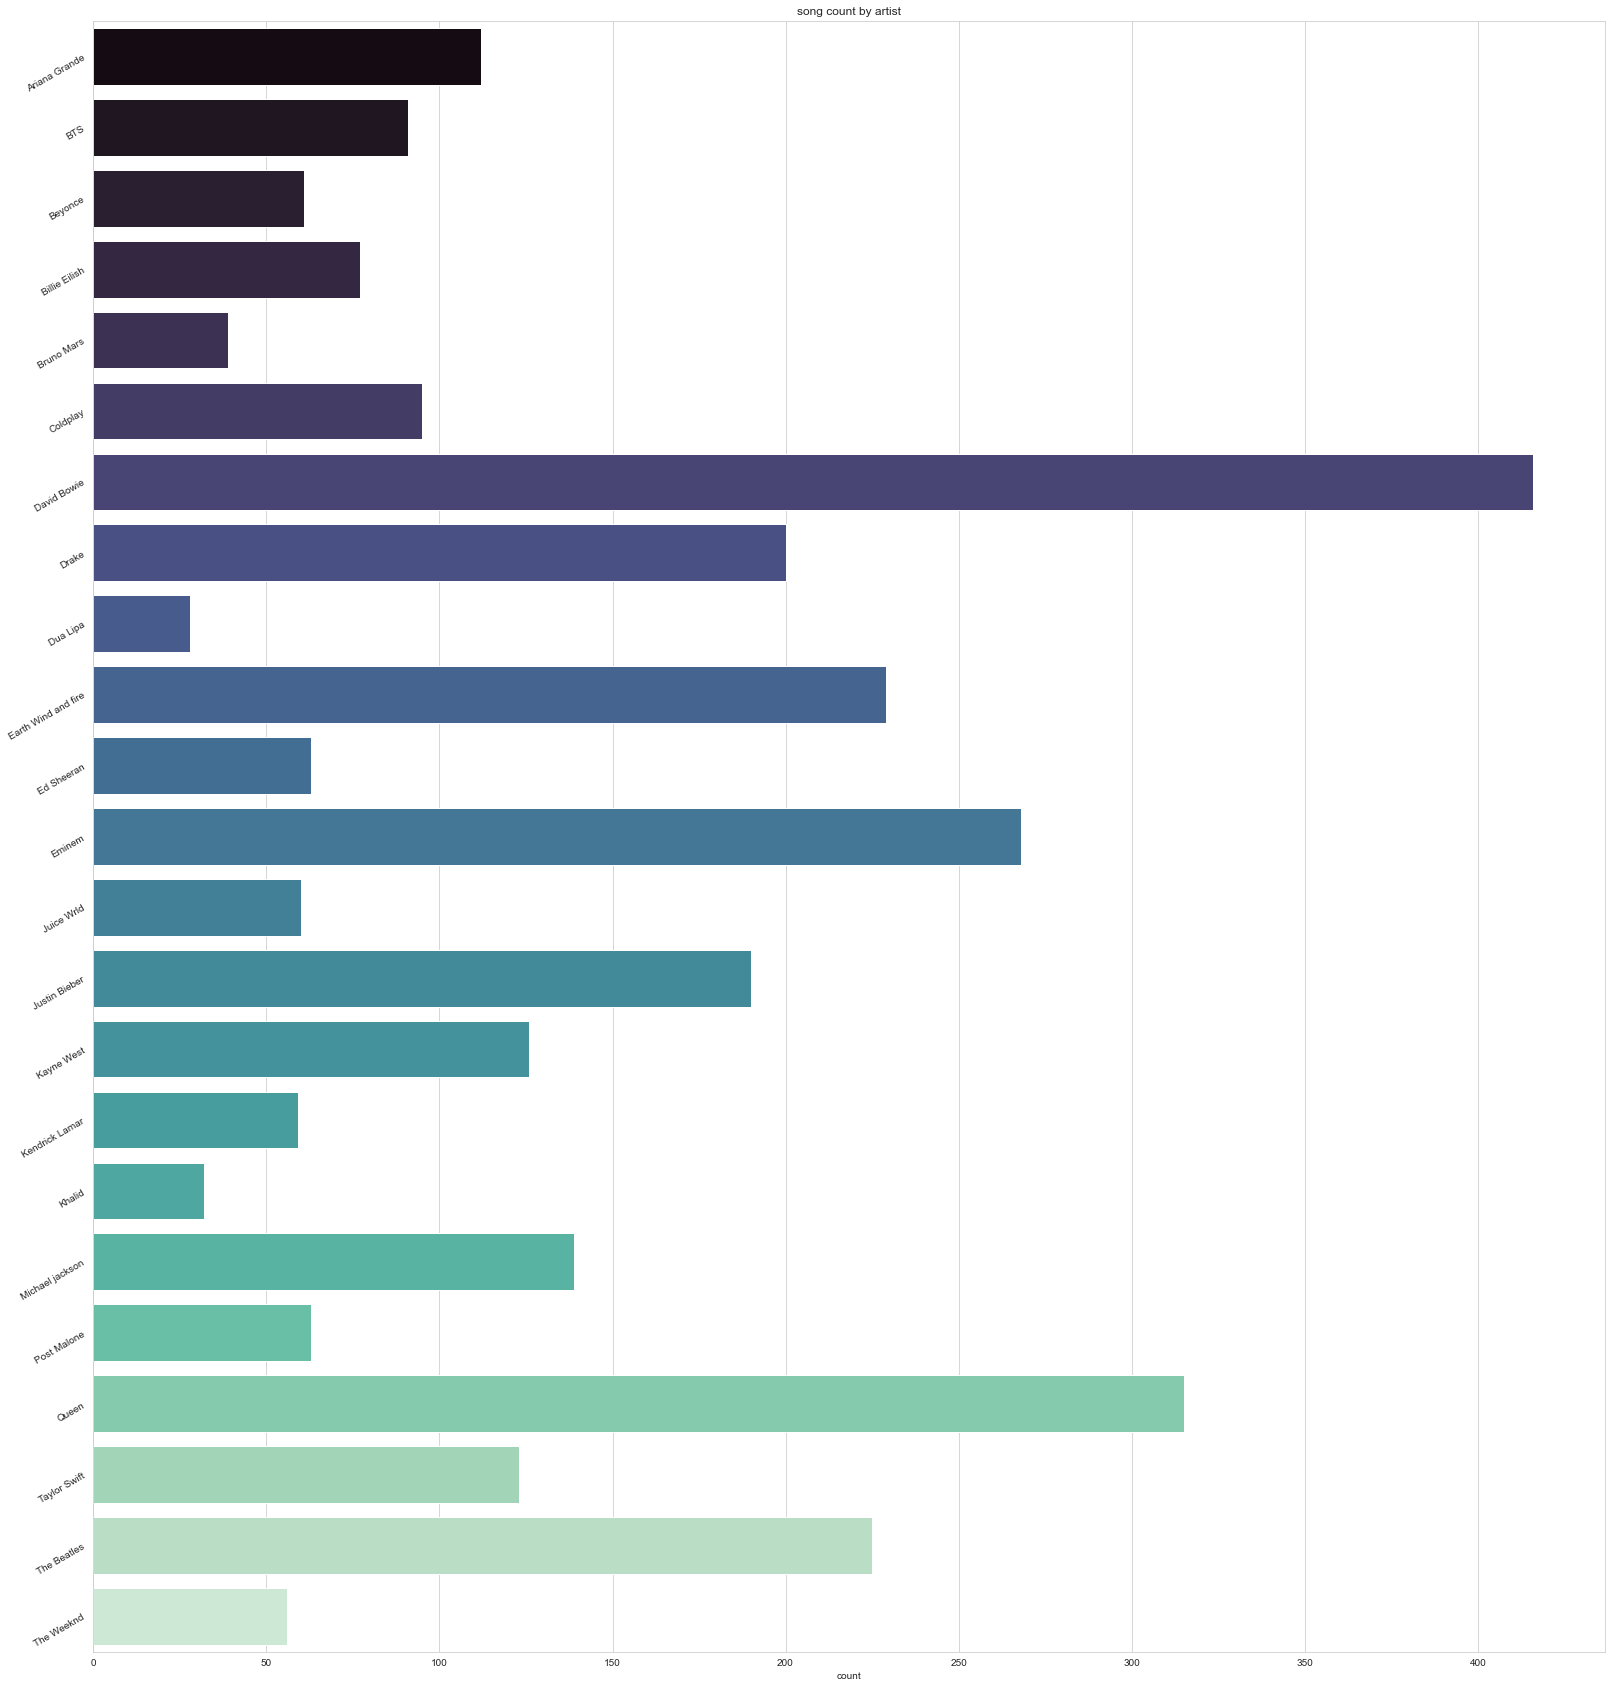

In [14]:
fig,ax= plt.subplots(figsize=(30,30))
sns.barplot(data=dataset.groupby('artist').count().reset_index(),y="artist",x='uuid',ax=ax, palette='mako')
ax.set(xlabel = 'count',ylabel='',title='song count by artist')
matplotlib.rcParams.update({'font.size': 50})
plt.yticks(rotation=30)
plt.subplots_adjust(left=0.2)
plt.savefig("Outputs/artists.png")

<AxesSubplot:xlabel='uuid', ylabel='genre'>

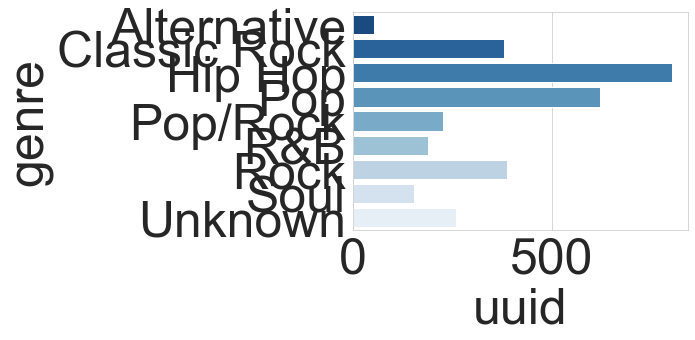

In [15]:
sns.barplot(data=dataset.groupby('genre').count().reset_index(),y="genre",x='uuid', palette='Blues_r')

In [16]:
dataset.groupby('genre').count()

,artist,song,album,year,uuid,duration,rms,path
genre,,,,,,,,
Alternative,53,53,53,53,53,53,53,53
Classic Rock,380,369,380,380,380,380,380,380
Hip Hop,802,802,802,802,802,802,802,802
Pop,620,620,620,620,620,620,620,620
Pop/Rock,225,225,225,225,225,225,225,225
R&B,188,188,188,188,188,188,188,188
Rock,387,387,387,387,387,387,387,387
Soul,154,154,154,154,154,154,154,154
Unknown,258,241,226,258,258,258,258,258


<AxesSubplot:xlabel='duration', ylabel='Count'>

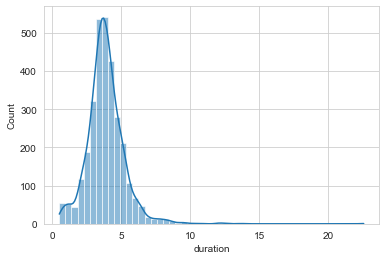

In [9]:
sns.histplot(dataset.duration/60,kde=True,bins=50)

<AxesSubplot:xlabel='uuid', ylabel='year'>

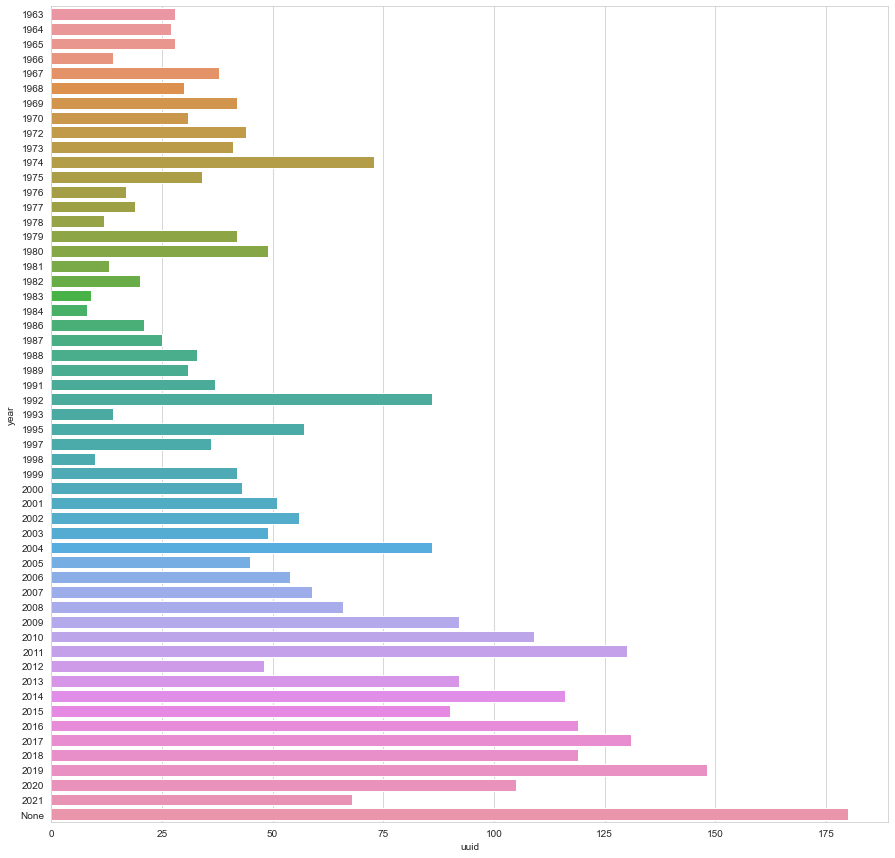

In [10]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.barplot(data=dataset.groupby('year').count().reset_index().sort_values('year'),y="year",x='uuid',ax=axes)

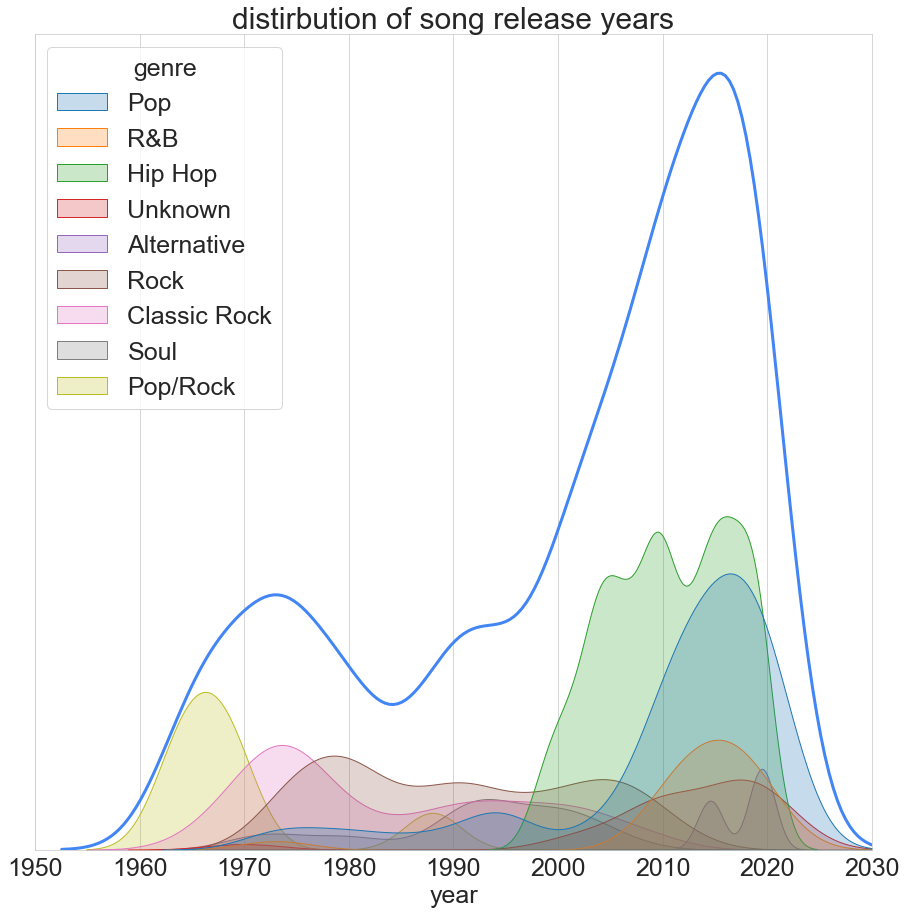

In [83]:
import matplotlib
fig,ax= plt.subplots(figsize=(15,15))
sns.kdeplot(dataset.year[dataset.year != 'None'].apply(lambda x:x[0:4]).astype(int),color='#4285f4ff',linewidth=3,shade=False)

matplotlib.rcParams.update({'font.size': 25})

ax.set(ylabel='',yticks=[],xlim = (1950,2030),title='distirbution of song release years')
sns.kdeplot(
    data=dataset, x=dataset.year[dataset.year != 'None'].apply(lambda x:x[0:4]).astype(int), hue="genre", fill=True,ax=ax)

plt.savefig('Outputs/yeardist.png')

In [12]:
file_dir = '../data/data.unsplit_data'

In [13]:
unsplit_path = '../data/data/unsplit_data/Ariana Grande/'+dataset[dataset.song=='positions'].iloc[0].path
split_path = '../data/data/split_pool/'+dataset[dataset.song=='positions'].iloc[0].uuid+'.mp3'

C:\Users\jngt\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


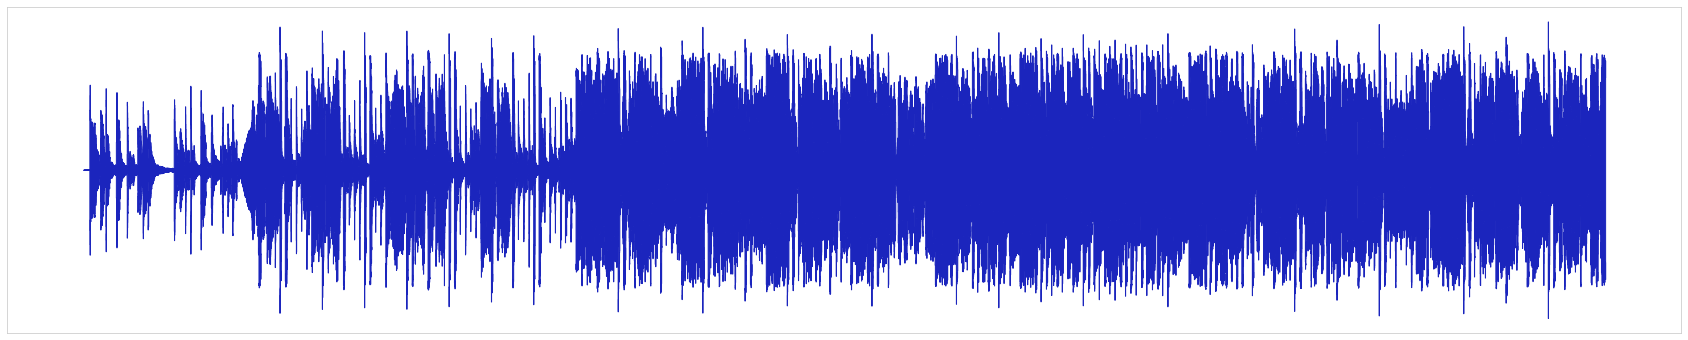

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load(unsplit_path,duration=60)
fig, ax = plt.subplots(1,1,figsize = (30,6))
librosa.display.waveshow(y, sr=sr, ax=ax,color='#1B25BD')
ax.set(ylabel='',yticks=[],xticks=[],xlabel='')
display()
plt.savefig('Outputs/1.png')

C:\Users\jngt\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


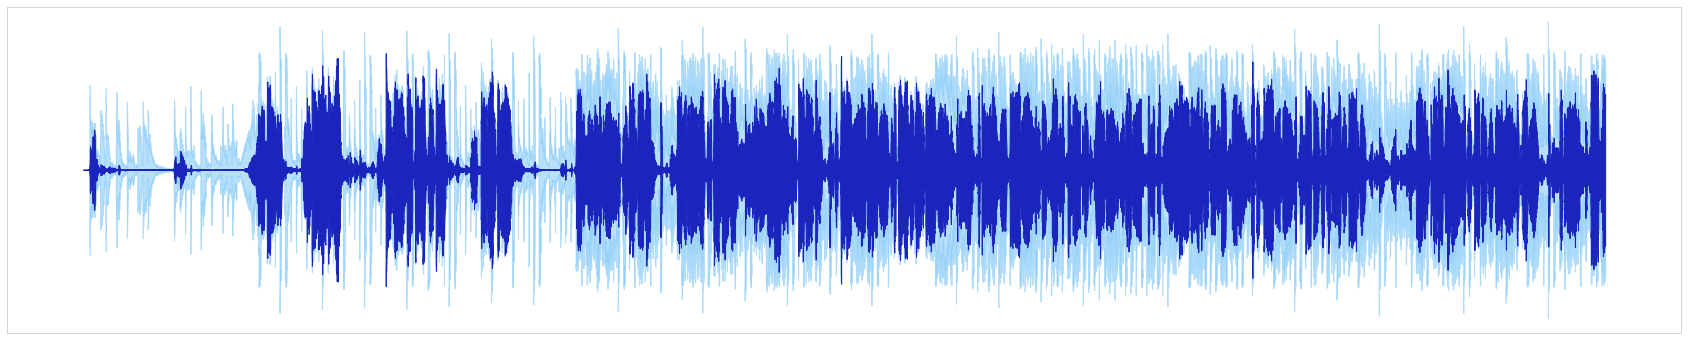

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load(unsplit_path,duration=60)
y_2,sr_2 = librosa.load(split_path,duration=60)
fig, ax1 = plt.subplots(1,1,figsize = (30,6))
librosa.display.waveshow(y, sr=sr, ax=ax1,color='#72C2F7',alpha=.5)
librosa.display.waveshow(y_2, sr=sr_2, ax=ax1,color='#1B25BD')
ax1.set(ylabel='',yticks=[],xticks=[],xlabel='')
display()
plt.savefig('Outputs/2.png')

C:\Users\jngt\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


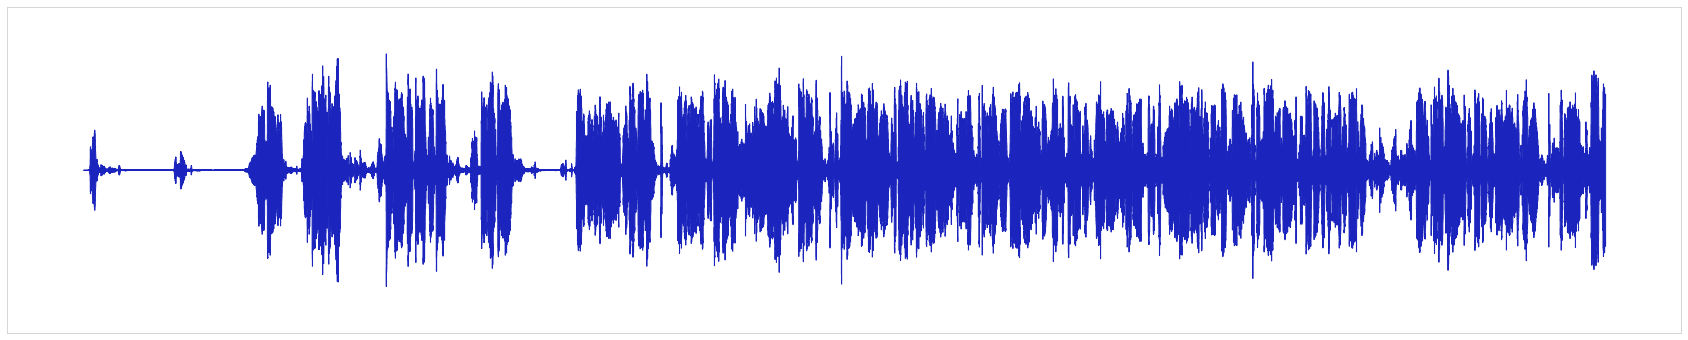

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y_2,sr_2 = librosa.load(split_path,duration=60)
fig, ax = plt.subplots(1,1,figsize = (30,6))
librosa.display.waveshow(y_2, sr=sr_2, ax=ax,color='#1B25BD')
ax.set(ylabel='',yticks=[],xticks=[],xlabel='',ylim=ax1.get_ylim())
display()
plt.savefig('Outputs/3.png')

In [17]:
S = librosa.feature.melspectrogram(y=y_2, sr=sr_2, n_mels=128,
                                    fmax=120000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
display()

C:\Users\jngt\anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


C:\Users\jngt\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


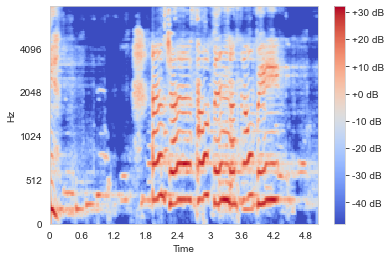

In [18]:
y_3,sr_3 = librosa.load(split_path,duration=5,offset=10)
fig, ax = plt.subplots()
melspec = librosa.feature.melspectrogram(
            y_3, sr=sr_3, n_mels=128, fmin=100, fmax=8000,
        )
melspec = librosa.power_to_db(melspec)
img = librosa.display.specshow(melspec, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set()
display()
plt.savefig('Outputs/3.png')

In [20]:
len(dataset.artist.unique())

23

In [21]:
len(dataset.uuid.unique())

3067

In [24]:
dataset.duration.sum()/60/60

197.14322564031647

In [25]:
dataset.album.nunique()

261

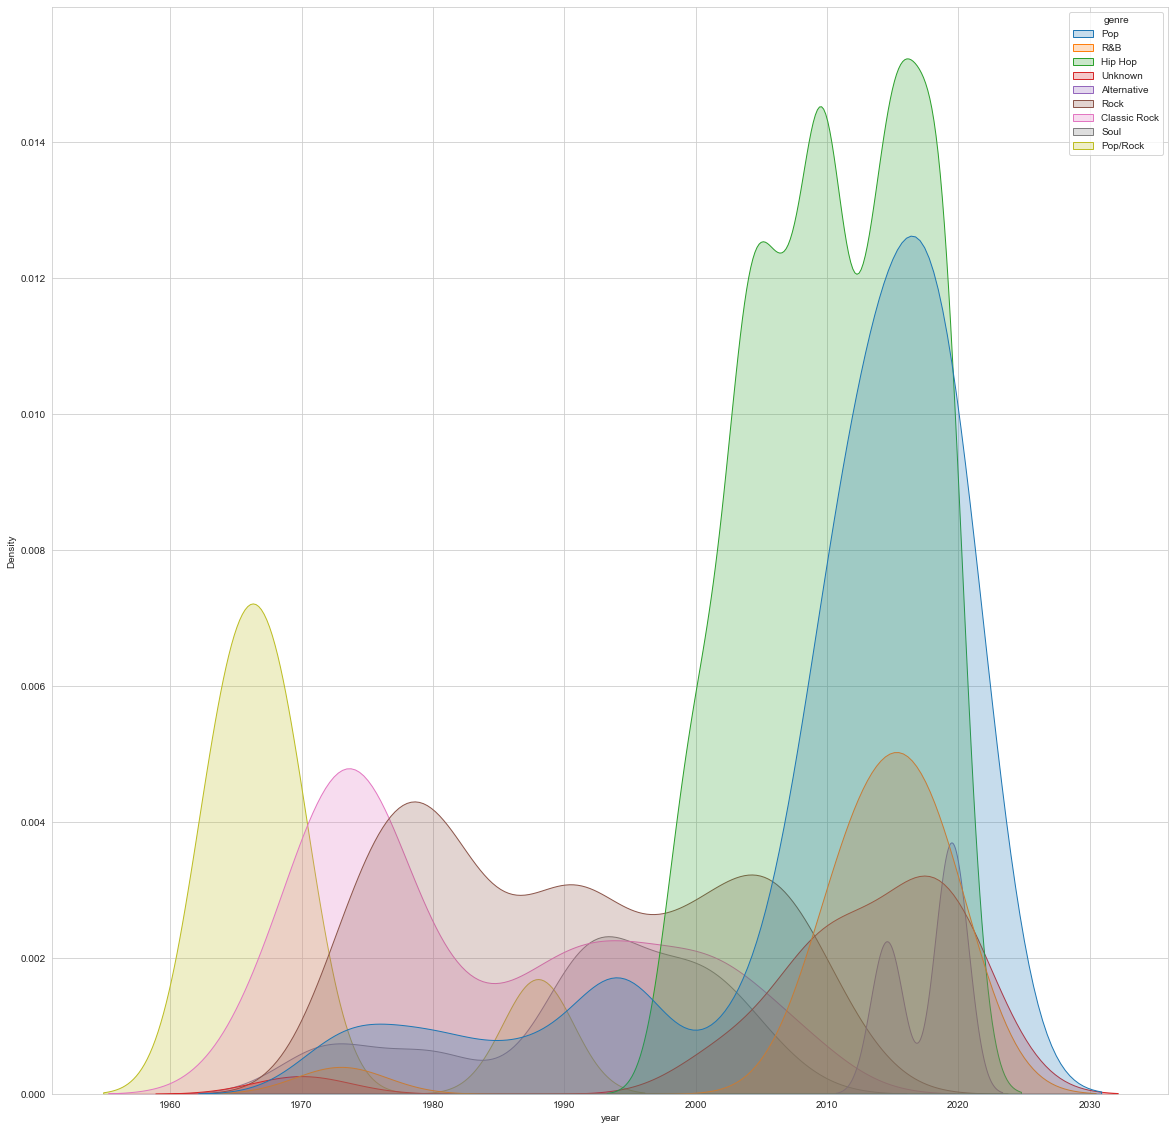

In [80]:
fig,ax=plt.subplots(figsize=(20,20))
sns.kdeplot(
    data=dataset, x=dataset.year[dataset.year != 'None'].apply(lambda x:x[0:4]).astype(int), hue="genre", fill=True,ax=ax)
matplotlib.rcParams.update({'font.size': 10})